In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="2eOZiaYbTKlrmCqasL69")
project = rf.workspace("yssp").project("field-xzc0o")
version = project.version(6)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...


In [6]:
import os
import yaml
import cv2
import matplotlib.pyplot as plt
import numpy as np

# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ„Éë„Çπ
dataset_path = "./field.v6i.yolov8"

# data.yaml„ÇíË™≠„ÅøËæº„Åø
with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
    data_config = yaml.safe_load(f)

print("=== „Éá„Éº„Çø„Çª„ÉÉ„ÉàÊÉÖÂ†± ===")
print(f"„ÇØ„É©„ÇπÊï∞: {data_config['nc']}")
print(f"„ÇØ„É©„ÇπÂêç: {data_config['names']}")

# ÂêÑ„Çª„ÉÉ„Éà„ÅÆÁîªÂÉèÊï∞„ÇíÁ¢∫Ë™ç
for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(dataset_path, split, 'images')
    if os.path.exists(img_dir):
        count = len(os.listdir(img_dir))
        print(f"{split}„Çª„ÉÉ„Éà: {count}Êûö")

=== „Éá„Éº„Çø„Çª„ÉÉ„ÉàÊÉÖÂ†± ===
„ÇØ„É©„ÇπÊï∞: 7
„ÇØ„É©„ÇπÂêç: ['18Yard', '18Yard Circle', '5Yard', 'First Half Central Circle', 'First Half Field', 'Second Half Central Circle', 'Second Half Field']
train„Çª„ÉÉ„Éà: 2523Êûö
valid„Çª„ÉÉ„Éà: 161Êûö
test„Çª„ÉÉ„Éà: 101Êûö



=== „ÇØ„É©„ÇπIDÂØæÂøúË°® ===
ID 0: 18Yard
ID 1: 18Yard Circle
ID 2: 5Yard
ID 3: First Half Central Circle
ID 4: First Half Field
ID 5: Second Half Central Circle
ID 6: Second Half Field


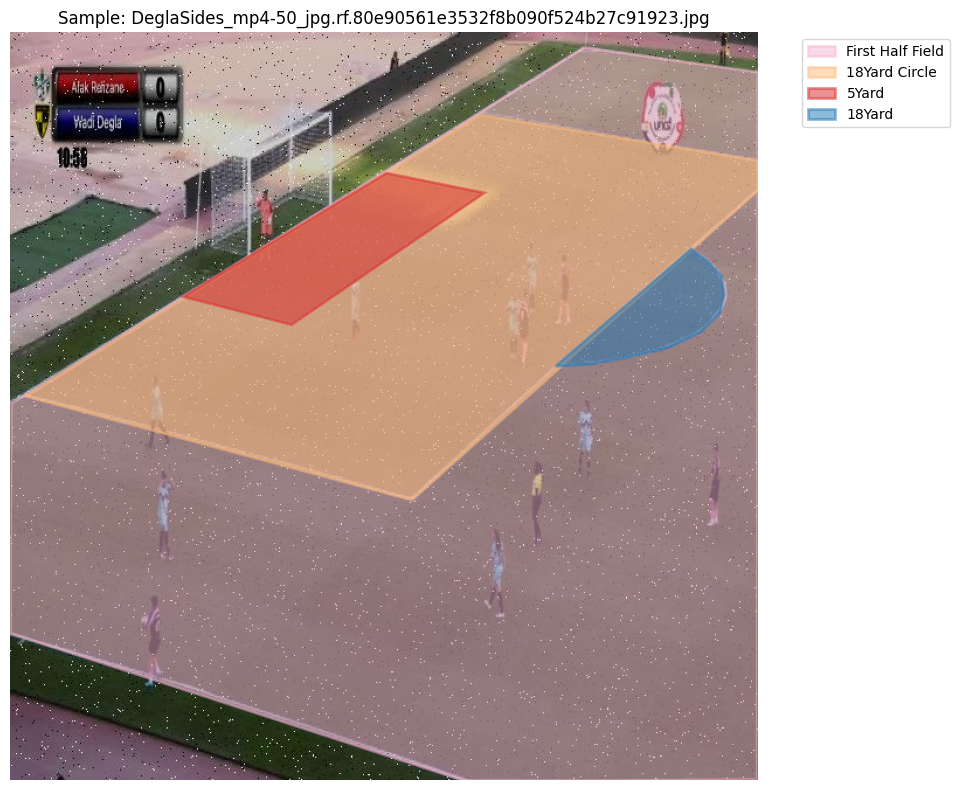

In [7]:
# „ÇØ„É©„ÇπID„Å®ÂêçÂâç„ÅÆÂØæÂøú„ÇíË°®Á§∫
print("\n=== „ÇØ„É©„ÇπIDÂØæÂøúË°® ===")
for idx, name in enumerate(data_config['names']):
    print(f"ID {idx}: {name}")

# „Çµ„É≥„Éó„É´ÁîªÂÉè„Å®„Ç¢„Éé„ÉÜ„Éº„Ç∑„Éß„É≥„ÇíÁ¢∫Ë™ç
train_images = os.listdir(os.path.join(dataset_path, 'train', 'images'))
sample_image_name = train_images[0]

# ÁîªÂÉè„ÇíË™≠„ÅøËæº„Åø
img_path = os.path.join(dataset_path, 'train', 'images', sample_image_name)
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# „É©„Éô„É´„Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„Åø
label_name = sample_image_name.replace('.jpg', '.txt').replace('.png', '.txt')
label_path = os.path.join(dataset_path, 'train', 'labels', label_name)

# ÂèØË¶ñÂåñ
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(img_rgb)

# „Çª„Ç∞„É°„É≥„ÉÜ„Éº„Ç∑„Éß„É≥„Éû„Çπ„ÇØ„ÇíÊèèÁîª
colors = plt.cm.tab20(np.linspace(0, 1, len(data_config['names'])))

with open(label_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        class_id = int(parts[0])
        
        # „Éù„É™„Ç¥„É≥Â∫ßÊ®ôÔºàÊ≠£Ë¶èÂåñ„Åï„Çå„Å¶„ÅÑ„ÇãÔºâ
        coords = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
        
        # ÁîªÂÉè„Çµ„Ç§„Ç∫„Å´Âêà„Çè„Åõ„Å¶„Çπ„Ç±„Éº„É´
        h, w = img.shape[:2]
        coords[:, 0] *= w
        coords[:, 1] *= h
        
        # „Éù„É™„Ç¥„É≥„ÇíÊèèÁîª
        from matplotlib.patches import Polygon
        poly = Polygon(coords, alpha=0.5, 
                      facecolor=colors[class_id],
                      edgecolor=colors[class_id],
                      linewidth=2,
                      label=f"{data_config['names'][class_id]}")
        ax.add_patch(poly)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title(f"Sample: {sample_image_name}")
ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# ÂÖ®„É©„Éô„É´„Éï„Ç°„Ç§„É´„Åã„Çâ„ÇØ„É©„ÇπÂàÜÂ∏É„ÇíÈõÜË®à
from collections import Counter

class_counts = Counter()
total_polygons = 0

label_dir = os.path.join(dataset_path, 'train', 'labels')
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f:
                if line.strip():
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1
                    total_polygons += 1

print(f"\n=== „ÇØ„É©„ÇπÂàÜÂ∏ÉÔºàË®ìÁ∑¥„Çª„ÉÉ„ÉàÔºâ===")
print(f"Á∑è„Éù„É™„Ç¥„É≥Êï∞: {total_polygons}")
for class_id in sorted(class_counts.keys()):
    count = class_counts[class_id]
    class_name = data_config['names'][class_id]
    percentage = (count / total_polygons) * 100
    print(f"{class_id}: {class_name:<30} {count:>6}ÂÄã ({percentage:>5.1f}%)")


=== „ÇØ„É©„ÇπÂàÜÂ∏ÉÔºàË®ìÁ∑¥„Çª„ÉÉ„ÉàÔºâ===
Á∑è„Éù„É™„Ç¥„É≥Êï∞: 11117
0: 18Yard                           1941ÂÄã ( 17.5%)
1: 18Yard Circle                    1834ÂÄã ( 16.5%)
2: 5Yard                            1484ÂÄã ( 13.3%)
3: First Half Central Circle        1158ÂÄã ( 10.4%)
4: First Half Field                 1797ÂÄã ( 16.2%)
5: Second Half Central Circle       1195ÂÄã ( 10.7%)
6: Second Half Field                1708ÂÄã ( 15.4%)


In [9]:
import torch
import platform

print("=== „Ç∑„Çπ„ÉÜ„É†ÊÉÖÂ†± ===")
print(f"Python version: {platform.python_version()}")
print(f"PyTorch version: {torch.__version__}")
print(f"MPSÂà©Áî®ÂèØËÉΩ: {torch.backends.mps.is_available()}")
print(f"MPS built: {torch.backends.mps.is_built()}")

if torch.backends.mps.is_available():
    print("\n‚úÖ MPS„ÅåÂà©Áî®ÂèØËÉΩ„Åß„ÅôÔºÅ")
    # „ÉÜ„Çπ„Éà
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print(f"MPS„ÉÜ„Çπ„ÉàÊàêÂäü: {x}")
else:
    print("\n‚ùå MPS„ÅåÂà©Áî®„Åß„Åç„Åæ„Åõ„Çì")

=== „Ç∑„Çπ„ÉÜ„É†ÊÉÖÂ†± ===
Python version: 3.11.13
PyTorch version: 2.7.1
MPSÂà©Áî®ÂèØËÉΩ: True
MPS built: True

‚úÖ MPS„ÅåÂà©Áî®ÂèØËÉΩ„Åß„ÅôÔºÅ
MPS„ÉÜ„Çπ„ÉàÊàêÂäü: tensor([1.], device='mps:0')


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/Users/rn/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
‚úÖ Apple Silicon GPU (MPS) „Çí‰ΩøÁî®„Åó„Åæ„Åô
üíæ „É¶„Éã„Éï„Ç°„Ç§„Éâ„É°„É¢„É™: 64GB
ÁèæÂú®„ÅÆMPS„É°„É¢„É™‰ΩøÁî®Èáè: 0.00 GB
üìù Phase 1: Nano „É¢„Éá„É´„ÅßÂü∫Á§éÂ≠¶Áøí
Ëá™ÂãïË®≠ÂÆö„Åï„Çå„Åü„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: 32

=== YOLOv8n-seg È´òÊÄßËÉΩÂ≠¶Áøí ===
„É¢„Éá„É´„Çµ„Ç§„Ç∫: n
ÁîªÂÉè„Çµ„Ç§„Ç∫: 640
„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: 32
„Ç®„Éù„ÉÉ„ÇØÊï∞: 30
„Ç≠„É£„ÉÉ„Ç∑„É•: ram



üöÄ Â≠¶Áøí„ÇíÈñãÂßã„Åó„Åæ„Åô...
Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.7.1 MPS (Apple M4 Max)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=field_data_64gb.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=field_seg_64gb_n_20250802_214746, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspec

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /Users/rn/Documents/FC/Text2Field/field.v6i.yolov8/train/labels... 2523 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2523/2523 [00:00<00:00, 4698.15it/s]

train: New cache created: /Users/rn/Documents/FC/Text2Field/field.v6i.yolov8/train/labels.cache


WARNING ‚ö†Ô∏è cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.9GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2523/2523 [00:00<00:00, 3436.74it/s]

val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 4871.2¬±1643.6 MB/s, size: 129.0 KB)



val: Scanning /Users/rn/Documents/FC/Text2Field/field.v6i.yolov8/valid/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 161/161 [00:00<00:00, 4438.71it/s]

val: New cache created: /Users/rn/Documents/FC/Text2Field/field.v6i.yolov8/valid/labels.cache
WARNING ‚ö†Ô∏è cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 161/161 [00:00<00:00, 2870.54it/s]


Plotting labels to runs/segment/field_seg_64gb_n_20250802_214746/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/field_seg_64gb_n_20250802_214746
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       1/30      10.5G       0.83       1.61      1.721      1.133        310        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:10<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:18<00:36, 18.33s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:27<00:13, 13.17s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:38<00:00, 12.97s/it]

                   all        161        705      0.421      0.115     0.0578     0.0286      0.337     0.0479      0.017    0.00602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       2/30      10.5G     0.7913      1.205      1.215      1.094        262        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [02:33<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:11<00:22, 11.27s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:23<00:12, 12.06s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:31<00:00, 10.52s/it]

                   all        161        705      0.432      0.299      0.217      0.147      0.422      0.245      0.178      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       3/30      10.5G     0.7079       1.03      1.082      1.052        284        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [02:51<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:14<00:28, 14.14s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:28<00:14, 14.10s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:35<00:00, 11.75s/it]

                   all        161        705      0.399      0.215      0.146     0.0953      0.391      0.207      0.141     0.0977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       4/30      10.5G     0.6635     0.9715       1.02      1.025        263        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [02:49<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:16<00:33, 16.65s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:34<00:17, 17.18s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:45<00:00, 15.10s/it]

                   all        161        705      0.407       0.21      0.172      0.132      0.411      0.208       0.17      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       5/30      10.6G     0.6118     0.8572     0.9543     0.9976        273        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:00<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:16<00:32, 16.44s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:33<00:16, 16.60s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:43<00:00, 14.54s/it]

                   all        161        705      0.582      0.264      0.234      0.196       0.58      0.261      0.232      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       6/30      10.6G     0.5748      0.797     0.9096     0.9807        274        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:25<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:15<00:31, 15.87s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:29<00:14, 14.35s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:40<00:00, 13.61s/it]

                   all        161        705      0.572      0.192      0.181       0.16      0.554      0.187      0.174      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       7/30      10.5G     0.5403     0.7552     0.8768     0.9648        242        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:37<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:16<00:33, 16.61s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:32<00:16, 16.16s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:46<00:00, 15.41s/it]

                   all        161        705       0.59      0.204      0.187      0.165      0.588      0.203      0.184      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       8/30      10.6G     0.5236     0.7233     0.8542     0.9561        304        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:27<00:00,  2.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:15<00:31, 15.84s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:36<00:18, 18.73s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:47<00:00, 15.96s/it]

                   all        161        705      0.601      0.195       0.16      0.144      0.589      0.193      0.159      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
       9/30      10.5G     0.5072     0.6814     0.8338     0.9514        241        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:27<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:17<00:34, 17.23s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:34<00:17, 17.24s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:45<00:00, 15.01s/it]

                   all        161        705      0.651      0.265       0.25      0.225      0.646      0.262      0.247      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      10/30      10.6G     0.4827     0.6522     0.8072     0.9375        274        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:29<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:17<00:35, 17.90s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:30<00:14, 14.71s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:39<00:00, 13.02s/it]

                   all        161        705      0.673      0.298      0.259      0.232      0.658      0.293      0.255      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      11/30      10.5G     0.4617     0.6237     0.7871     0.9287        279        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:33<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:17<00:34, 17.24s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:28<00:13, 13.92s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:45<00:00, 15.14s/it]

                   all        161        705       0.63      0.463      0.365      0.333      0.622      0.455      0.359      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      12/30      10.6G      0.445     0.5976     0.7775      0.923        297        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:35<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:14<00:28, 14.04s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:32<00:16, 16.48s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:42<00:00, 14.07s/it]

                   all        161        705      0.696      0.287      0.248      0.229      0.684      0.282      0.244      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      13/30      10.6G     0.4359     0.5948     0.7629     0.9183        277        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:43<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:15<00:30, 15.08s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:33<00:16, 16.86s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:44<00:00, 14.87s/it]

                   all        161        705      0.686      0.541       0.43      0.387      0.676      0.535      0.424      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      14/30      10.6G     0.4242     0.5755     0.7495     0.9178        284        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:33<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:19<00:39, 19.77s/it]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 2/3 [00:44<00:22, 22.79s/it]

WARNING ‚ö†Ô∏è NMS time limit 3.650s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [01:00<00:00, 20.12s/it]

                   all        161        705      0.589      0.533      0.427      0.398      0.578      0.523      0.419      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      15/30      10.5G     0.4101     0.5467     0.7327     0.9089        265        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:35<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:42<00:00, 14.23s/it]

                   all        161        705      0.687      0.913      0.732      0.678      0.682      0.905      0.726      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      16/30      10.3G     0.4053     0.5509     0.7256     0.9086        235        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [03:51<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:53<00:00, 17.83s/it]

                   all        161        705       0.67      0.946      0.781      0.726      0.681      0.923      0.779      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      17/30      10.4G      0.399     0.5312     0.7139     0.9033        256        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:07<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:39<00:00, 13.18s/it]

                   all        161        705       0.71      0.939      0.782      0.727      0.702      0.933      0.776      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      18/30      10.3G     0.3872     0.5124     0.6991     0.9005        313        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:24<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ‚ö†Ô∏è NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:51<00:00, 17.13s/it]

                   all        161        705      0.702      0.766      0.679      0.643      0.696       0.76      0.671      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      19/30      10.3G      0.378     0.5009      0.685     0.8972        259        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:05<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:26<00:00,  8.81s/it]

                   all        161        705      0.704      0.935      0.799      0.755      0.702      0.929      0.796      0.732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      20/30      10.3G     0.3729     0.5024     0.6764     0.8963        279        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:21<00:00,  7.25s/it]

                   all        161        705      0.679      0.936      0.747      0.703      0.672      0.927      0.741       0.68


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      21/30      9.32G     0.3794     0.4195     0.6389     0.9031        108        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [07:06<00:00,  5.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:21<00:00,  7.01s/it]

                   all        161        705        0.7      0.953      0.747      0.692      0.695      0.945      0.743      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      22/30      9.43G     0.3684     0.4067     0.6107     0.8924        109        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [05:57<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:21<00:00,  7.09s/it]

                   all        161        705      0.697      0.951      0.782       0.74      0.702       0.92      0.776      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      23/30      9.41G      0.358     0.4052     0.5949     0.8885        117        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [05:53<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:26<00:00,  8.79s/it]

                   all        161        705      0.702      0.962      0.767       0.73      0.698      0.949      0.762      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      24/30      9.44G     0.3468     0.3919     0.5808     0.8825        106        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [05:26<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:11<00:00,  3.91s/it]

                   all        161        705      0.699      0.966      0.786      0.744       0.69      0.951      0.781      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      25/30      9.41G     0.3304     0.3773     0.5561     0.8727        109        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:51<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:15<00:00,  5.23s/it]

                   all        161        705       0.69      0.954      0.784      0.747      0.682      0.952       0.78      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      26/30      9.53G     0.3271     0.3824     0.5413     0.8745        110        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:26<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:10<00:00,  3.43s/it]

                   all        161        705      0.729      0.951      0.848      0.813      0.723      0.944      0.843       0.79



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      27/30      9.29G     0.3056     0.3636     0.5105     0.8654        112        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:22<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:10<00:00,  3.54s/it]

                   all        161        705      0.708      0.928      0.808      0.777      0.701       0.92      0.803      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      28/30       9.4G     0.2983     0.3686     0.4961     0.8601        112        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:20<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:13<00:00,  4.59s/it]

                   all        161        705       0.79      0.926      0.895      0.866      0.783      0.919      0.891      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      29/30      9.43G     0.2896      0.354     0.4744     0.8568        114        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:31<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:16<00:00,  5.56s/it]

                   all        161        705      0.807      0.899      0.901      0.873      0.793      0.906      0.896      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]divide by zero encountered in matmul
overflow encountered in matmul
invalid value encountered in matmul
      30/30      9.58G     0.2764     0.3363      0.448     0.8578        106        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79/79 [04:13<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:08<00:00,  2.72s/it]

                   all        161        705      0.781       0.94      0.898      0.872      0.774      0.933      0.893      0.837



30 epochs completed in 2.310 hours.
Optimizer stripped from runs/segment/field_seg_64gb_n_20250802_214746/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/field_seg_64gb_n_20250802_214746/weights/best.pt, 6.8MB

Validating runs/segment/field_seg_64gb_n_20250802_214746/weights/best.pt...
Ultralytics 8.3.173 üöÄ Python-3.11.13 torch-2.7.1 MPS (Apple M4 Max)
YOLOv8n-seg summary (fused): 85 layers, 3,259,429 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [01:01<00:00, 20.63s/it]


                   all        161        705      0.806      0.901      0.901      0.873      0.793      0.906      0.896      0.837
                18Yard        137        138      0.993      0.979      0.994      0.962      0.954      0.964      0.983      0.929
         18Yard Circle        125        126      0.997      0.992      0.995      0.924      0.989      0.984      0.993      0.875
                 5Yard        106        107          1      0.967      0.991      0.933       0.99      0.958      0.984      0.871
First Half Central Circle         63         64      0.662      0.875      0.854      0.846      0.638      0.906      0.854      0.823
      First Half Field        113        113      0.672      0.858      0.821      0.816      0.668      0.871      0.821      0.811
Second Half Central Circle         55         56      0.682      0.881      0.846      0.838      0.685      0.911      0.846      0.786
     Second Half Field        100        101      0.638      0

KeyError: 'train/lr0'

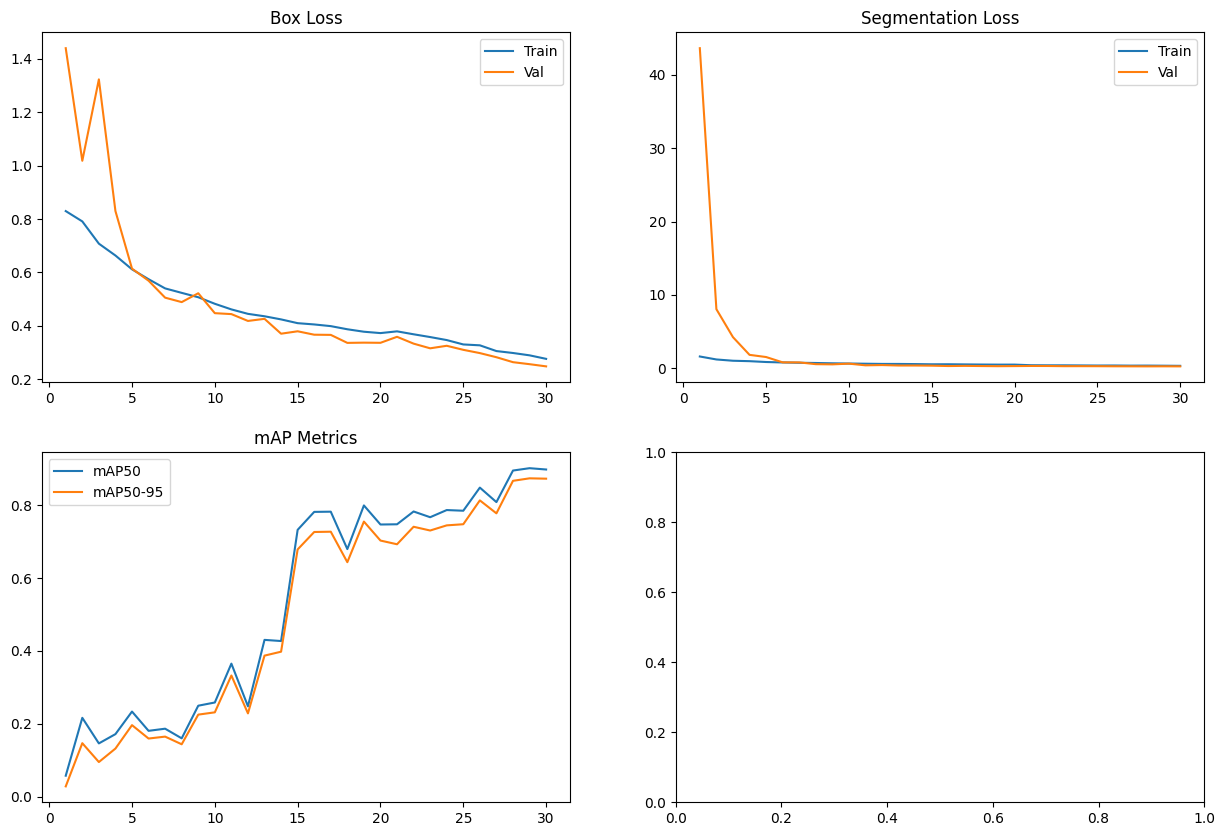

: 

In [ ]:
import os
import yaml
import torch
from ultralytics import YOLO
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

class YOLOv8MPSTrainer64GB:
    """64GB „É¶„Éã„Éï„Ç°„Ç§„Éâ„É°„É¢„É™ MacÁî®„ÅÆÊúÄÈÅ©Âåñ„Åï„Çå„ÅüYOLOv8Â≠¶Áøí"""
    
    def __init__(self, dataset_path: str):
        self.dataset_path = os.path.abspath(dataset_path)
        self.device = self._setup_device()
        self.data_config = self._prepare_data_config()
        
        # 64GBÁî®„ÅÆÁí∞Â¢ÉÂ§âÊï∞Ë®≠ÂÆö
        os.environ['PYTORCH_MPS_HIGH_WATERMARK_RATIO'] = '0.0'
        os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
        
    def _setup_device(self):
        """„Éá„Éê„Ç§„Çπ„ÅÆË®≠ÂÆö„Å®ÊÉÖÂ†±Ë°®Á§∫"""
        if torch.backends.mps.is_available():
            device = 'mps'
            print("‚úÖ Apple Silicon GPU (MPS) „Çí‰ΩøÁî®„Åó„Åæ„Åô")
            print("üíæ „É¶„Éã„Éï„Ç°„Ç§„Éâ„É°„É¢„É™: 64GB")
            
            # „É°„É¢„É™‰ΩøÁî®Áä∂Ê≥Å„ÇíÁ¢∫Ë™ç
            if hasattr(torch.mps, 'current_allocated_memory'):
                print(f"ÁèæÂú®„ÅÆMPS„É°„É¢„É™‰ΩøÁî®Èáè: {torch.mps.current_allocated_memory() / 1e9:.2f} GB")
        else:
            device = 'cpu'
            print("‚ö†Ô∏è MPS„ÅåÂà©Áî®„Åß„Åç„Å™„ÅÑ„Åü„ÇÅ„ÄÅCPU„Çí‰ΩøÁî®„Åó„Åæ„Åô")
        return device
    
    def _prepare_data_config(self):
        """„Éá„Éº„ÇøË®≠ÂÆö„ÅÆÊ∫ñÂÇô"""
        with open(os.path.join(self.dataset_path, "data.yaml"), 'r') as f:
            data_config = yaml.safe_load(f)
        
        data_config['path'] = self.dataset_path
        
        temp_yaml_path = 'field_data_64gb.yaml'
        with open(temp_yaml_path, 'w') as f:
            yaml.dump(data_config, f)
        
        return temp_yaml_path
    
    def get_optimal_batch_size(self, model_size='m', imgsz=640):
        """64GB„É°„É¢„É™„Å´ÊúÄÈÅ©„Å™„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíÊé®ÂÆö"""
        # „É¢„Éá„É´„Çµ„Ç§„Ç∫„Å®„É°„É¢„É™‰ΩøÁî®Èáè„ÅÆÈñ¢‰øÇÔºàÁµåÈ®ìÂâáÔºâ
        batch_size_map = {
            'n': {'320': 64, '416': 48, '640': 32, '800': 24, '1280': 12},
            's': {'320': 48, '416': 36, '640': 24, '800': 16, '1280': 8},
            'm': {'320': 32, '416': 24, '640': 16, '800': 12, '1280': 6},
            'l': {'320': 24, '416': 16, '640': 12, '800': 8, '1280': 4},
            'x': {'320': 16, '416': 12, '640': 8, '800': 6, '1280': 3},
        }
        
        imgsz_str = str(imgsz)
        if imgsz_str not in batch_size_map[model_size]:
            # ÊúÄ„ÇÇËøë„ÅÑ„Çµ„Ç§„Ç∫„ÇíÈÅ∏Êäû
            sizes = list(map(int, batch_size_map[model_size].keys()))
            closest = min(sizes, key=lambda x: abs(x - imgsz))
            imgsz_str = str(closest)
        
        return batch_size_map[model_size][imgsz_str]
    
    def train_high_performance(self, 
                              model_size='m',    # 64GB„Å™„Çâmedium„É¢„Éá„É´„ÇÇÂø´ÈÅ©
                              epochs=100,        # „Çà„ÇäÂ§ö„Åè„ÅÆ„Ç®„Éù„ÉÉ„ÇØ„ÇÇÂèØËÉΩ
                              imgsz=640,
                              auto_batch=True,   # Ëá™Âãï„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫Ë™øÊï¥
                              cache='ram',       # RAM„Å´„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí„Ç≠„É£„ÉÉ„Ç∑„É•
                              multi_scale=True,  # „Éû„É´„ÉÅ„Çπ„Ç±„Éº„É´Â≠¶Áøí
                              patience=20):
        """È´òÊÄßËÉΩÂ≠¶Áøí„ÅÆÂÆüË°å"""
        
        # ÊúÄÈÅ©„Å™„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫„ÇíËá™ÂãïË®≠ÂÆö
        if auto_batch:
            batch_size = self.get_optimal_batch_size(model_size, imgsz)
            print(f"Ëá™ÂãïË®≠ÂÆö„Åï„Çå„Åü„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: {batch_size}")
        else:
            batch_size = 16  # „Éá„Éï„Ç©„É´„Éà
        
        print(f"\n=== YOLOv8{model_size}-seg È´òÊÄßËÉΩÂ≠¶Áøí ===")
        print(f"„É¢„Éá„É´„Çµ„Ç§„Ç∫: {model_size}")
        print(f"ÁîªÂÉè„Çµ„Ç§„Ç∫: {imgsz}")
        print(f"„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫: {batch_size}")
        print(f"„Ç®„Éù„ÉÉ„ÇØÊï∞: {epochs}")
        print(f"„Ç≠„É£„ÉÉ„Ç∑„É•: {cache}")
        
        # „É¢„Éá„É´ÂàùÊúüÂåñ
        model = YOLO(f'yolov8{model_size}-seg.pt')
        
        # È´òÊÄßËÉΩÂ≠¶Áøí„Éë„É©„É°„Éº„Çø
        training_args = {
            'data': self.data_config,
            'epochs': epochs,
            'imgsz': imgsz,
            'batch': batch_size,
            'device': self.device,
            'patience': patience,
            'save': True,
            'project': 'runs/segment',
            'name': f'field_seg_64gb_{model_size}_{datetime.now().strftime("%Y%m%d_%H%M%S")}',
            'exist_ok': False,
            'pretrained': True,
            
            # ÊúÄÈÅ©ÂåñË®≠ÂÆö
            'optimizer': 'AdamW',      # „Çà„ÇäËâØ„ÅÑÂèéÊùü
            'lr0': 0.01,              # ÂàùÊúüÂ≠¶ÁøíÁéá
            'lrf': 0.01,              # ÊúÄÁµÇÂ≠¶ÁøíÁéá‰øÇÊï∞
            'momentum': 0.937,         # SGD momentum/Adam beta1
            'weight_decay': 0.0005,    # Èáç„ÅøÊ∏õË°∞
            
            # 64GBÁâπÊúâ„ÅÆË®≠ÂÆö
            'cache': cache,            # „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíRAM„Å´„Ç≠„É£„ÉÉ„Ç∑„É•
            'workers': 8,              # „Éá„Éº„Çø„É≠„Éº„ÉÄ„Éº„ÉØ„Éº„Ç´„ÉºÊï∞
            'amp': False,              # MPS„Åß„ÅØAMPÁÑ°Âäπ
            
            # „Éá„Éº„ÇøÊã°Âºµ
            'hsv_h': 0.015,           # HSV-Hue
            'hsv_s': 0.7,             # HSV-Saturation
            'hsv_v': 0.4,             # HSV-Value
            'degrees': 0.0,           # ÂõûËª¢
            'translate': 0.1,         # ÁßªÂãï
            'scale': 0.5,             # „Çπ„Ç±„Éº„É´
            'shear': 0.0,             # „Åõ„ÇìÊñ≠
            'perspective': 0.0,       # ÈÄèË¶ñÂ§âÊèõ
            'flipud': 0.0,            # ‰∏ä‰∏ãÂèçËª¢
            'fliplr': 0.5,            # Â∑¶Âè≥ÂèçËª¢
            'mosaic': 1.0,            # „É¢„Ç∂„Ç§„ÇØ
            'mixup': 0.0,             # „Éü„ÉÉ„ÇØ„Çπ„Ç¢„ÉÉ„Éó
            'copy_paste': 0.0,        # „Ç≥„Éî„Éº„Éö„Éº„Çπ„Éà
            
            # „Åù„ÅÆ‰ªñ
            'verbose': True,
            'seed': 42,
            'deterministic': True,
            'single_cls': False,
            'rect': False,
            'cos_lr': False,          # „Ç≥„Çµ„Ç§„É≥Â≠¶ÁøíÁéá„Çπ„Ç±„Ç∏„É•„Éº„É©
            'close_mosaic': 10,       # ÊúÄÂæå„ÅÆ10„Ç®„Éù„ÉÉ„ÇØ„Åß„É¢„Ç∂„Ç§„ÇØÁÑ°Âäπ
            
            # „Éû„É´„ÉÅ„Çπ„Ç±„Éº„É´Â≠¶Áøí
            'multi_scale': multi_scale,
        }
        
        # Â≠¶ÁøíÂÆüË°å
        print("\nüöÄ Â≠¶Áøí„ÇíÈñãÂßã„Åó„Åæ„Åô...")
        results = model.train(**training_args)
        
        print("\n‚úÖ Â≠¶Áøí„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")
        
        # ÁµêÊûú„ÅÆ‰øùÂ≠ò
        best_model_path = Path(results.save_dir) / 'weights' / 'best.pt'
        last_model_path = Path(results.save_dir) / 'weights' / 'last.pt'
        
        self._plot_training_results(results)
        
        return best_model_path, results
    
    def _plot_training_results(self, results):
        """Â≠¶ÁøíÁµêÊûú„ÅÆÂèØË¶ñÂåñ"""
        # Â≠¶ÁøíÊõ≤Á∑ö„ÅÆ„Éó„É≠„ÉÉ„Éà
        results_path = Path(results.save_dir) / 'results.csv'
        
        if results_path.exists():
            import pandas as pd
            df = pd.read_csv(results_path)
            
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            # Box loss
            axes[0, 0].plot(df['epoch'], df['train/box_loss'], label='Train')
            axes[0, 0].plot(df['epoch'], df['val/box_loss'], label='Val')
            axes[0, 0].set_title('Box Loss')
            axes[0, 0].legend()
            
            # Segmentation loss
            axes[0, 1].plot(df['epoch'], df['train/seg_loss'], label='Train')
            axes[0, 1].plot(df['epoch'], df['val/seg_loss'], label='Val')
            axes[0, 1].set_title('Segmentation Loss')
            axes[0, 1].legend()
            
            # mAP
            axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
            axes[1, 0].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
            axes[1, 0].set_title('mAP Metrics')
            axes[1, 0].legend()
            
            # Learning rate
            axes[1, 1].plot(df['epoch'], df['train/lr0'], label='lr0')
            axes[1, 1].set_title('Learning Rate')
            axes[1, 1].set_yscale('log')
            
            plt.tight_layout()
            plt.savefig(Path(results.save_dir) / 'training_curves.png', dpi=300)
            plt.show()
    
    def benchmark_inference_speed(self, model_path: str, test_images_dir: str, num_images=10):
        """Êé®Ë´ñÈÄüÂ∫¶„ÅÆ„Éô„É≥„ÉÅ„Éû„Éº„ÇØ"""
        import time
        
        model = YOLO(model_path)
        
        # „ÉÜ„Çπ„ÉàÁîªÂÉè„ÇíÂèñÂæó
        test_images = list(Path(test_images_dir).glob('*.jpg'))[:num_images]
        
        # „Ç¶„Ç©„Éº„É†„Ç¢„ÉÉ„Éó
        for _ in range(3):
            _ = model(test_images[0], device=self.device, verbose=False)
        
        # „Éô„É≥„ÉÅ„Éû„Éº„ÇØ
        times = []
        for img_path in test_images:
            start = time.time()
            _ = model(img_path, device=self.device, verbose=False)
            times.append(time.time() - start)
        
        avg_time = np.mean(times) * 1000  # ms
        fps = 1000 / avg_time
        
        print(f"\nüìä Êé®Ë´ñÈÄüÂ∫¶„Éô„É≥„ÉÅ„Éû„Éº„ÇØÁµêÊûú:")
        print(f"Âπ≥ÂùáÊé®Ë´ñÊôÇÈñì: {avg_time:.2f} ms/ÁîªÂÉè")
        print(f"FPS: {fps:.2f}")
        
        return avg_time, fps


# ÂÆüË°å„Çπ„ÇØ„É™„Éó„Éà
if __name__ == "__main__":
    # 64GBÊúÄÈÅ©Âåñ„Éà„É¨„Éº„Éä„Éº„ÇíÂàùÊúüÂåñ
    trainer = YOLOv8MPSTrainer64GB(dataset_path="./field.v6i.yolov8")
    
    # „Éó„É≠„Ç∞„É¨„ÉÉ„Ç∑„ÉñÂ≠¶ÁøíÊà¶Áï•
    # 1. „Åæ„ÅöÂ∞è„Åï„ÅÑ„É¢„Éá„É´„ÅßÈ´òÈÄü„Å´Â≠¶Áøí
    print("üìù Phase 1: Nano „É¢„Éá„É´„ÅßÂü∫Á§éÂ≠¶Áøí")
    nano_model, _ = trainer.train_high_performance(
        model_size='n',
        epochs=30,
        imgsz=640,
        multi_scale=False
    )
    
    # 2. ‰∏≠Ë¶èÊ®°„É¢„Éá„É´„ÅßÊú¨Ê†ºÂ≠¶Áøí
    print("\nüìù Phase 2: Medium „É¢„Éá„É´„ÅßÊú¨Ê†ºÂ≠¶Áøí")
    medium_model, _ = trainer.train_high_performance(
        model_size='m',
        epochs=100,
        imgsz=640,
        multi_scale=True
    )
    
    # 3. Â§ßË¶èÊ®°„É¢„Éá„É´„ÅßÁ≤æÂ∫¶ËøΩÊ±ÇÔºà„Ç™„Éó„Ç∑„Éß„É≥Ôºâ
    print("\nüìù Phase 3: Large „É¢„Éá„É´„ÅßÈ´òÁ≤æÂ∫¶Â≠¶Áøí")
    large_model, _ = trainer.train_high_performance(
        model_size='l',
        epochs=100,
        imgsz=800,  # „Çà„ÇäÈ´òËß£ÂÉèÂ∫¶
        multi_scale=True
    )
    
    # „Éô„É≥„ÉÅ„Éû„Éº„ÇØ
    test_dir = "./field.v6i.yolov8/test/images"
    trainer.benchmark_inference_speed(medium_model, test_dir)

In [8]:
# 1. ÊúÄ„ÇÇ„Ç∑„É≥„Éó„É´„Å™Êé®Ë´ñÔºàJupyterÁî®Ôºâ
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# „É¢„Éá„É´„Çí„É≠„Éº„ÉâÔºàÊúÄÊñ∞„ÅÆ„É¢„Éá„É´„Éë„Çπ„ÇíÊåáÂÆöÔºâ
model_path = "runs/segment/field_seg_64gb_n_20250802_214746/weights/best.pt"  # ÂÆüÈöõ„ÅÆ„Éë„Çπ„Å´Â§âÊõ¥
model = YOLO(model_path)

# ÁîªÂÉè„ÇíÊé®Ë´ñ
image_path = "sample2.png"  # Êé®Ë´ñ„Åó„Åü„ÅÑÁîªÂÉè
results = model(image_path)

# ÁµêÊûú„ÇíË°®Á§∫
results[0].show()  # Âà•„Ç¶„Ç£„É≥„Éâ„Ç¶„ÅßË°®Á§∫


image 1/1 /Users/rn/Documents/FC/Text2Field/sample2.png: 384x640 2 First Half Central Circles, 2 First Half Fields, 28.7ms
Speed: 0.9ms preprocess, 28.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


üîç Ëá™ÂãïÊ§úÂá∫: runs/segment/field_seg_64gb_n_20250802_214746/weights/best.pt
üì¶ „É¢„Éá„É´„Çí„É≠„Éº„Éâ‰∏≠...
üñºÔ∏è Êé®Ë´ñÂÆüË°å: sample1.png

image 1/1 /Users/rn/Documents/FC/Text2Field/sample1.png: 480x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 40.7ms
Speed: 1.5ms preprocess, 40.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
‚úÖ 4ÂÄã„ÅÆ„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÇíÊ§úÂá∫
   - Second Half Field: 1ÂÄã
   - First Half Field: 1ÂÄã
   - First Half Central Circle: 1ÂÄã
   - Second Half Central Circle: 1ÂÄã


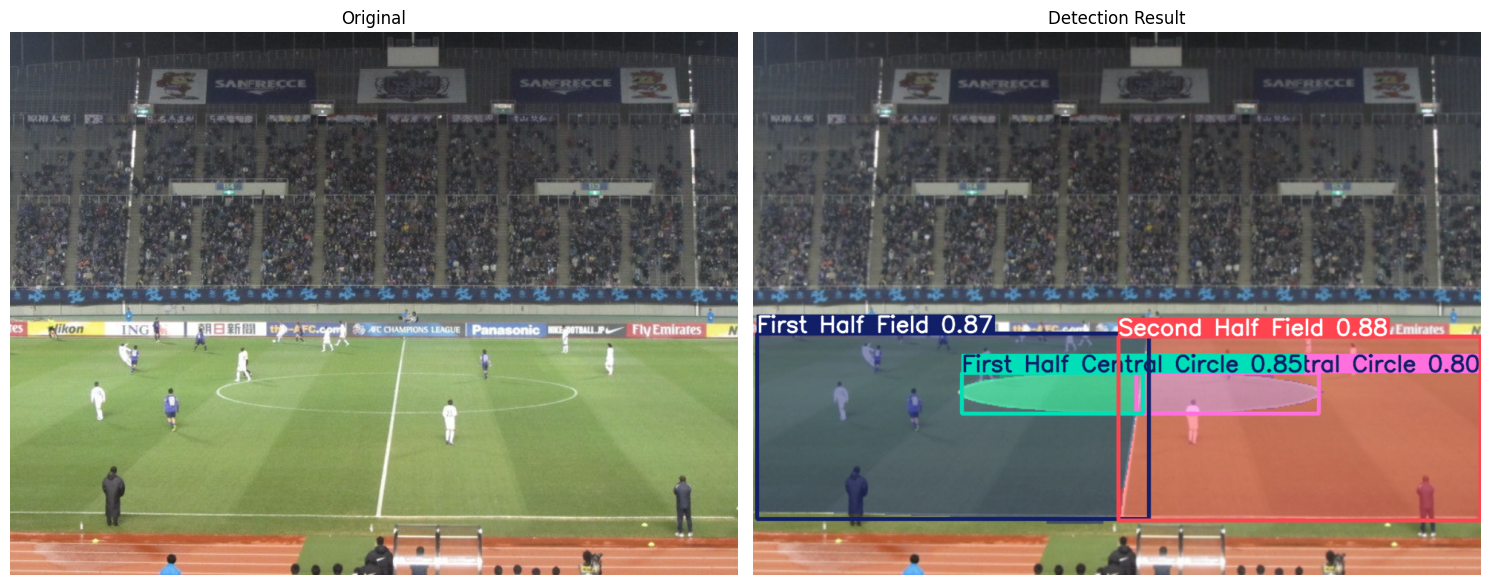

üíæ ÁµêÊûú„Çí‰øùÂ≠ò: result.jpg


In [9]:
def inference_jupyter(image_path, model_path=None):
    """JupyterÁí∞Â¢ÉÁî®„ÅÆÊé®Ë´ñÈñ¢Êï∞"""
    
    # „É¢„Éá„É´„Éë„Çπ„ÅÆËá™ÂãïÊ§úÁ¥¢
    if model_path is None:
        from pathlib import Path
        runs_dir = Path("runs/segment")
        if runs_dir.exists():
            # ÊúÄÊñ∞„ÅÆbest.pt„ÇíÊé¢„Åô
            best_models = list(runs_dir.glob("*/weights/best.pt"))
            if best_models:
                model_path = str(max(best_models, key=lambda p: p.stat().st_mtime))
                print(f"üîç Ëá™ÂãïÊ§úÂá∫: {model_path}")
            else:
                raise FileNotFoundError("Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì")
    
    # „É¢„Éá„É´„É≠„Éº„Éâ
    print(f"üì¶ „É¢„Éá„É´„Çí„É≠„Éº„Éâ‰∏≠...")
    model = YOLO(model_path)
    
    # Êé®Ë´ñÂÆüË°å
    print(f"üñºÔ∏è Êé®Ë´ñÂÆüË°å: {image_path}")
    results = model(image_path, conf=0.25)
    result = results[0]
    
    # Ê§úÂá∫ÁµêÊûú„ÇíË°®Á§∫
    if result.boxes is not None:
        print(f"‚úÖ {len(result.boxes)}ÂÄã„ÅÆ„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÇíÊ§úÂá∫")
        
        # „ÇØ„É©„Çπ„Åî„Å®„ÅÆÈõÜË®à
        class_counts = {}
        for box in result.boxes:
            class_name = model.names[int(box.cls)]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
        
        for name, count in class_counts.items():
            print(f"   - {name}: {count}ÂÄã")
    else:
        print("‚ùå Ê§úÂá∫„Å™„Åó")
    
    # ÁµêÊûú„ÇíÂèØË¶ñÂåñ
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # ÂÖÉÁîªÂÉè
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img_rgb)
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    # „Ç¢„Éé„ÉÜ„Éº„Ç∑„Éß„É≥ÁµêÊûú
    annotated = result.plot()
    axes[1].imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Detection Result")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # ÁµêÊûú„Çí‰øùÂ≠ò
    cv2.imwrite("result.jpg", annotated)
    print("üíæ ÁµêÊûú„Çí‰øùÂ≠ò: result.jpg")
    
    return results

# ‰ΩøÁî®‰æã
results = inference_jupyter("sample1.png")

In [10]:
import ipywidgets as widgets
from IPython.display import display

def interactive_inference():
    """„Ç§„É≥„Çø„É©„ÇØ„ÉÜ„Ç£„Éñ„Å™Êé®Ë´ñUI"""
    
    # „Ç¶„Ç£„Ç∏„Çß„ÉÉ„Éà‰ΩúÊàê
    file_upload = widgets.FileUpload(
        accept='image/*',
        multiple=False,
        description='ÁîªÂÉèÈÅ∏Êäû:'
    )
    
    conf_slider = widgets.FloatSlider(
        value=0.25,
        min=0.0,
        max=1.0,
        step=0.05,
        description='‰ø°È†ºÂ∫¶:',
        continuous_update=False
    )
    
    output = widgets.Output()
    
    def on_upload_change(change):
        """„Éï„Ç°„Ç§„É´„Ç¢„ÉÉ„Éó„É≠„Éº„ÉâÊôÇ„ÅÆÂá¶ÁêÜ"""
        with output:
            output.clear_output()
            
            if file_upload.value:
                # „Ç¢„ÉÉ„Éó„É≠„Éº„Éâ„Åï„Çå„Åü„Éï„Ç°„Ç§„É´„ÇíÂèñÂæó
                uploaded = file_upload.value[0]
                
                # ‰∏ÄÊôÇ„Éï„Ç°„Ç§„É´„Å®„Åó„Å¶‰øùÂ≠ò
                with open('temp_upload.jpg', 'wb') as f:
                    f.write(uploaded['content'])
                
                # Êé®Ë´ñÂÆüË°å
                results = inference_jupyter('temp_upload.jpg')
    
    # „Ç§„Éô„É≥„Éà„Éè„É≥„Éâ„É©„ÇíË®≠ÂÆö
    file_upload.observe(on_upload_change, names='value')
    conf_slider.observe(lambda x: on_upload_change(None), names='value')
    
    # UIË°®Á§∫
    display(widgets.VBox([file_upload, conf_slider, output]))

# ÂÆüË°å
interactive_inference()